# 0. Descriçao das Bibliotecas, Métodos e Estruturas

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Para o desenvolvimento deste projeto foi utilizada a linguagem Python na sua versão 3.10.0, por meio da ferramenta Jupyter Notebook na sua versão 6.4.5, instalado através do Anaconda Navigator.
<br>
<ul>
Foram utilizadas as bibliotecas:
    <li>Pandas, para a leitura, armazenamento e manejo dos dados</li>
    <li>Seaborn e matplotlib para o plot de gráficos durante a análise exploratória de dados</li>
    <li>sklearn para a utilizadação de modelos de machine learning</li>
</ul>

<br>

<ol>
Além do mais, foram utilizados os métodos para a execução das etapas de:
    <li> Importação e Tratamento dos Dados:</li>
    <li> Visualização e Análise Exploratória dos Dados</li>
    <li> Análise Preditiva e Prescritiva dos Dados</li>
</ol> 
<br>
Por fim utilizamos estruturas de dados que já estão embutidas na própia linguagem e nas bibliotecas importadas.

# 1. Importação e Tratamento dos Dados

#### Importação do dicionário

In [6]:
dici = pd.read_csv("dicionario.csv", delimiter=';')

Adequação do dicionário para o ambiente Python. Essa formalização pode ser util para utilizações futuras.

In [7]:
dici.Tipo.unique()

array(['Inteiro', 'Booleano', 'Texto', 'Double'], dtype=object)

In [8]:
dici.Tipo.replace('Inteiro', 'int', inplace=True)
dici.Tipo.replace('Booleano', 'boolean', inplace=True)
dici.Tipo.replace('Texto', 'str', inplace=True)
dici.Tipo.replace('Double', 'float', inplace=True)

In [9]:
dici.Tipo.unique()

array(['int', 'boolean', 'str', 'float'], dtype=object)

Criação de um dicionário (dict) o nome da coluna ao seu tipo( {Coluna : Tipo} )


In [10]:
tipos = dict(zip(list(dici.Coluna), list(dici.Tipo)))

#### Importação dos dados

Foi necessário declarar o tipo de encoding do dataset para a leitura.

In [11]:
data = pd.read_csv("dataset_teste_selecao.csv", encoding = 'unicode_escape')

É possível notar abaixo que boa parte das colunas não estão com seu tipo descrito no dicionário (booleano), mais a frente, com auxilio de um .head() é possivel ver a razão, as colunas booleanas estão assinaladas com "Sim" e "Não" (interpretadas como tipo object) .

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   paciente_id                               576 non-null    object 
 1   coriza                                    576 non-null    object 
 2   tosse_seca_ou_produtiva                   576 non-null    object 
 3   calafrios                                 576 non-null    object 
 4   febre                                     576 non-null    object 
 5   dispneia                                  576 non-null    object 
 6   fadiga                                    576 non-null    object 
 7   anorexia                                  576 non-null    object 
 8   mialgia                                   576 non-null    object 
 9   astenia                                   576 non-null    object 
 10  dor_de_garganta                       

In [23]:
data.head()

,paciente_id,coriza,tosse_seca_ou_produtiva,calafrios,febre,dispneia,fadiga,anorexia,mialgia,astenia,...,idade,cor_autorreferida,estado_civil,escolaridade,tipo_caso_à_admissão,tempo_sintomas_internacao,desfecho,obito_menos24horas,obito_vm,obito_uti
0,e5841df2166dd424a57127423d276bbe,Não,Não,Não,Não,Não,Não,Não,Não,Não,...,76.0,Parda/mulata,Casado/ amasiado,Ensino fundamental incompleto(1ºG),Caso suspeito,NaN,obito,Não,Sim,Sim
1,3c59dc048e8850243be8079a5c74d079,Não,Sim,Não,Sim,Sim,Não,Não,Sim,Não,...,33.0,Não informado,Não informado,Não informado,Caso suspeito,7.0,alta,NaN,NaN,NaN
2,99c5e07b4d5de9d18c350cdf64c5aa3d,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,...,42.0,Amarela/Oriental,Casado/ amasiado,Ensino médio completo,Caso suspeito,10.0,alta,NaN,NaN,NaN
3,1587965fb4d4b5afe8428a4a024feb0d,Não,Não,Não,Não,Sim,Não,Não,Não,Não,...,64.0,Branca,Casado/ amasiado,Ensino fundamental incompleto(1ºG),Caso suspeito,11.0,obito,Não,Sim,Sim
4,b4a528955b84f584974e92d025a75d1f,Não,Não,Não,Não,Sim,Não,Não,Não,Não,...,73.0,Parda/mulata,Casado/ amasiado,Ensino fundamental incompleto(1ºG),Caso suspeito,7.0,obito,Não,Sim,Sim


Visualização dos valores únicos em cada coluna para checar a integridade dos dados.

In [12]:
for i in data.columns:
    temp = data[i].unique()
    if len(temp) < 20:
        print(i)
        print(temp)
        print("\n--------------------------------------------\n")

coriza
['Não' 'Sim']

--------------------------------------------

tosse_seca_ou_produtiva
['Não' 'Sim']

--------------------------------------------

calafrios
['Não' 'Sim']

--------------------------------------------

febre
['Não' 'Sim']

--------------------------------------------

dispneia
['Não' 'Sim']

--------------------------------------------

fadiga
['Não' 'Sim']

--------------------------------------------

anorexia
['Não' 'Sim']

--------------------------------------------

mialgia
['Não' 'Sim']

--------------------------------------------

astenia
['Não' 'Sim']

--------------------------------------------

dor_de_garganta
['Não' 'Sim']

--------------------------------------------

congestao_nasal
['Não' 'Sim']

--------------------------------------------

cefaleia
['Não' 'Sim']

--------------------------------------------

diarreia
['Não' 'Sim']

--------------------------------------------

nausea
['Não' 'Sim']

--------------------------------------------

v

Conversão das coluna object ("Sim" ou "Não") para booleano (True, False)

In [13]:
for i in tipos:
    if tipos[i] == 'boolean':
        data[i].replace('Não', False, inplace=True)
        data[i].replace('Sim', True, inplace=True)
        data[i] = data[i].astype("boolean")

Criação de uma versão do dataset contendo a coluna "desfecho" como booleana para utilização no método da matriz de correlação

In [14]:
data_cor = data.copy()
data_cor['desfecho'].replace('alta', False, inplace=True)
data_cor['desfecho'].replace('obito', True, inplace=True)
data_cor['desfecho'] = data_cor['desfecho'].astype("boolean")

In [15]:
data_cor.head()

,paciente_id,coriza,tosse_seca_ou_produtiva,calafrios,febre,dispneia,fadiga,anorexia,mialgia,astenia,...,idade,cor_autorreferida,estado_civil,escolaridade,tipo_caso_à_admissão,tempo_sintomas_internacao,desfecho,obito_menos24horas,obito_vm,obito_uti
0,e5841df2166dd424a57127423d276bbe,False,False,False,False,False,False,False,False,False,...,76.0,Parda/mulata,Casado/ amasiado,Ensino fundamental incompleto(1ºG),Caso suspeito,NaN,True,False,True,True
1,3c59dc048e8850243be8079a5c74d079,False,True,False,True,True,False,False,True,False,...,33.0,Não informado,Não informado,Não informado,Caso suspeito,7.0,False,<NA>,<NA>,<NA>
2,99c5e07b4d5de9d18c350cdf64c5aa3d,False,False,False,True,True,False,False,False,False,...,42.0,Amarela/Oriental,Casado/ amasiado,Ensino médio completo,Caso suspeito,10.0,False,<NA>,<NA>,<NA>
3,1587965fb4d4b5afe8428a4a024feb0d,False,False,False,False,True,False,False,False,False,...,64.0,Branca,Casado/ amasiado,Ensino fundamental incompleto(1ºG),Caso suspeito,11.0,True,False,True,True
4,b4a528955b84f584974e92d025a75d1f,False,False,False,False,True,False,False,False,False,...,73.0,Parda/mulata,Casado/ amasiado,Ensino fundamental incompleto(1ºG),Caso suspeito,7.0,True,False,True,True


#### VERIFICAÇÃO DA INTEGRIDADE DOS DADOS
Testamos se alguma das entradas tinha ido a óbito na UTI, com ventilação mecanica ou menos de 24 horas depois de dar entrada no hospital ao mesmo tempo que recebeu alta.

In [16]:
print(len(data[(data['desfecho'] == 'alta') & (data['obito_uti'] == True)]),
len(data[(data['desfecho'] == 'alta') & (data['obito_menos24horas'] == True)]),
len(data[(data['desfecho'] == 'alta') & (data['obito_vm'] == True)]))

1 0 0


Foi possível verificar no dataset uma inconsistencia onde um paciente recebeu alta (desfecho == True) e ao mesmo tempo chegou a obito na UTI (obito_uti == True). O dado foi removido do dataset e o index foi refeito.

In [17]:
print("Tamanho antes da remoção: ",len(data))
data.drop(data[(data['desfecho'] == 'alta') & (data['obito_uti'] == True)].index, inplace=True)
data.reset_index(drop=True, inplace=True)
print("Tamanho após a remoção: ",len(data))

Tamanho antes da remoção:  576
Tamanho após a remoção:  575


Durante o plot dos dados de "tempo_sintomas_internacao"  foi notado que uma entrada era negativa, o que foi entendido como um erro e esta entrada foi multiplicada por -1 para ser positiva.

In [18]:
print(len(data[data["tempo_sintomas_internacao"]<0]))
index = data[data["tempo_sintomas_internacao"]<0].index
data.loc[index[0],"tempo_sintomas_internacao"] *=(-1)
print(len(data[data["tempo_sintomas_internacao"]<0]))

1
0


# 2. Visualização e Análise Exploratória dos Dados

Criação da matriz de correlação do dataset utilizando o método de pearson. Foi escolhido este método já que os métodos "Kendall Tau" e "Spearman rank" não são adequadas para valores booleanos.

In [19]:
cor_mtx = data_cor.corr(method ='pearson')

In [20]:
cor_mtx

,coriza,tosse_seca_ou_produtiva,calafrios,febre,dispneia,fadiga,anorexia,mialgia,astenia,dor_de_garganta,...,tempo_internacao,tempo_referencia_internacao,latitude,longitude,idade,tempo_sintomas_internacao,desfecho,obito_menos24horas,obito_vm,obito_uti
coriza,1.000000,0.119250,-0.024469,0.052304,0.053274,0.011305,-0.003210,0.060293,0.003928,0.115239,...,-0.001677,0.010579,-0.045387,0.092019,0.010280,0.023486,-0.054121,0.010607,0.009104,-0.010888
tosse_seca_ou_produtiva,0.119250,1.000000,0.019379,0.388732,0.280591,0.065824,-0.000762,0.146149,0.071714,0.108382,...,-0.104057,-0.059489,0.084730,0.184805,-0.089624,0.022163,-0.221997,-0.084751,-0.076975,-0.097331
calafrios,-0.024469,0.019379,1.000000,-0.008998,-0.023264,-0.024469,0.073943,0.051900,0.026498,0.088408,...,0.004102,0.021639,-0.024777,0.025267,-0.015672,-0.017705,-0.045287,-0.021491,-0.173973,0.021393
febre,0.052304,0.388732,-0.008998,1.000000,0.258907,0.035407,0.038906,0.216708,0.060026,0.066621,...,-0.083860,-0.057912,-0.021045,0.139272,-0.098044,0.006345,-0.087356,-0.100652,-0.115529,-0.083887
dispneia,0.053274,0.280591,-0.023264,0.258907,1.000000,-0.101314,-0.095935,0.073436,0.045153,0.041892,...,0.031786,-0.087636,-0.062330,0.082345,0.004374,-0.014046,-0.064232,-0.014546,-0.021248,-0.030124
fadiga,0.011305,0.065824,-0.024469,0.035407,-0.101314,1.000000,0.122860,0.163754,0.296712,-0.020170,...,-0.034359,0.074089,0.008667,0.030278,-0.041902,0.008857,-0.037640,-0.065630,0.076652,0.069015
anorexia,-0.003210,-0.000762,0.073943,0.038906,-0.095935,0.122860,1.000000,0.032177,0.005240,-0.025732,...,-0.030010,0.023973,0.048837,-0.007281,0.082205,0.097295,0.029539,-0.065630,-0.058444,-0.010888
mialgia,0.060293,0.146149,0.051900,0.216708,0.073436,0.163754,0.032177,1.000000,0.154301,0.096025,...,-0.027584,-0.020653,-0.063215,0.050669,-0.074439,-0.005309,-0.071329,-0.037546,-0.009872,-0.029867
astenia,0.003928,0.071714,0.026498,0.060026,0.045153,0.296712,0.005240,0.154301,1.000000,0.091070,...,-0.059416,-0.062953,0.043385,0.071661,-0.014540,-0.089042,-0.135044,0.003152,0.080982,0.072548
dor_de_garganta,0.115239,0.108382,0.088408,0.066621,0.041892,-0.020170,-0.025732,0.096025,0.091070,1.000000,...,0.014603,-0.003393,0.041855,0.083539,-0.059793,-0.028225,-0.144275,-0.061737,-0.070862,-0.099858


<bound method _AxesBase.set_xlabel of <AxesSubplot:>>

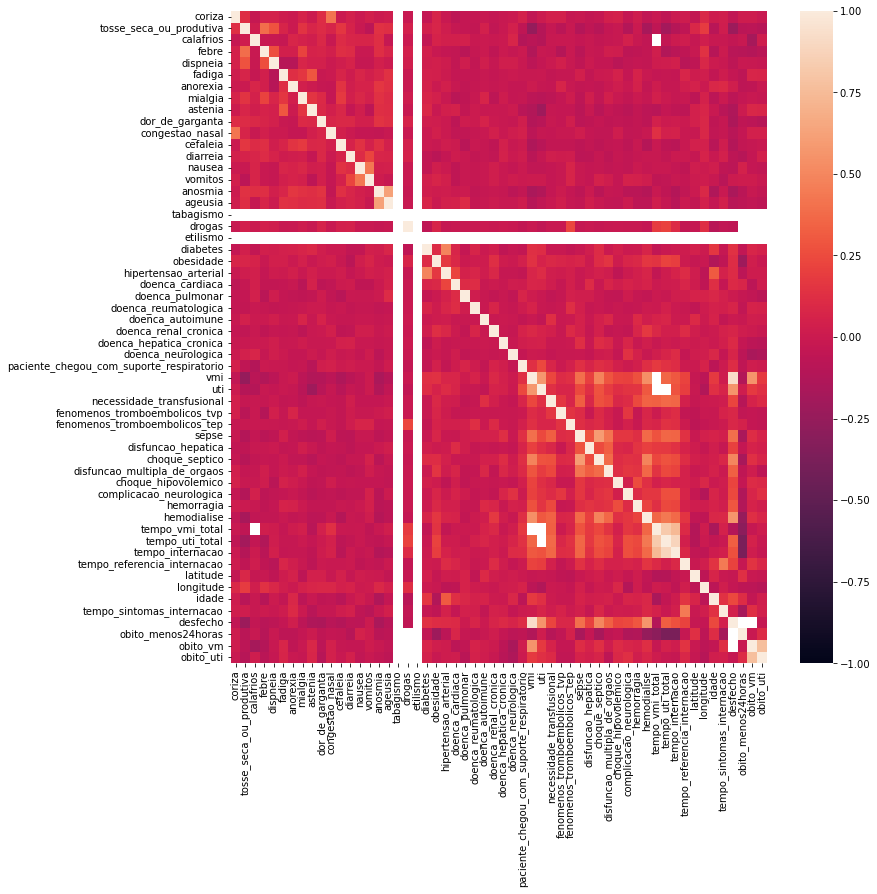

In [13]:
plt.figure(figsize = (12,12))
chart = sns.heatmap(cor_mtx, xticklabels=cor_mtx.index, yticklabels=cor_mtx.index, vmin=-1, vmax=1)
chart.set_xlabel

A figura apresenta um gráfico heatmap da matriz de correlação. Quanto mais claro e escuro maiores são as corelações (positiva e negativa). Pode-se observar regiões de forte, média e fraca correlação. No entanto, para facilitar a interpretação das correlações foi gerado o gráfico abaixo onde foram ordenadas as correlações. Além disso, o gráfico do heatmap apresenta uma inconsistencia causada por dados nulos, o que gerrou pixels brancos puros, o que não representa uma forte correlação positiva.

<AxesSubplot:>

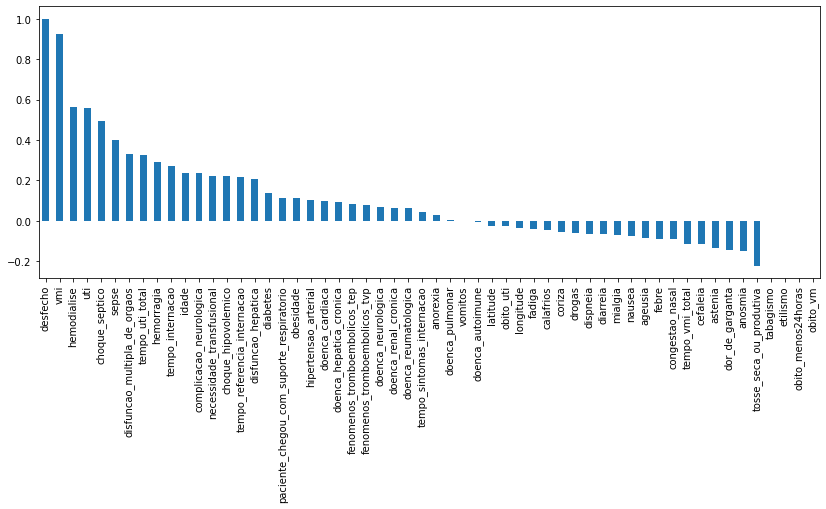

In [14]:
plt.figure(figsize = (14,5))
cor_mtx.desfecho.sort_values(ascending=False).plot.bar()

Pode-se observar que os desfechos do tipo óbito estão fortemente correlacionados com as variáveis vmi, e moderadamente correlacionadas com uti, hemodialise e choque_septico. A partir daí a correlação tende a diminuir.

A seguir foram selecionadas no dataset as variáveis de maior amplitude de variação (Tempo e idade) para analisar o comportamento da distribuição destes dados. Nos interessamos em relacionar as distribuições com o desfecho (óbito e alta).

<AxesSubplot:xlabel='tempo_sintomas_internacao', ylabel='Count'>

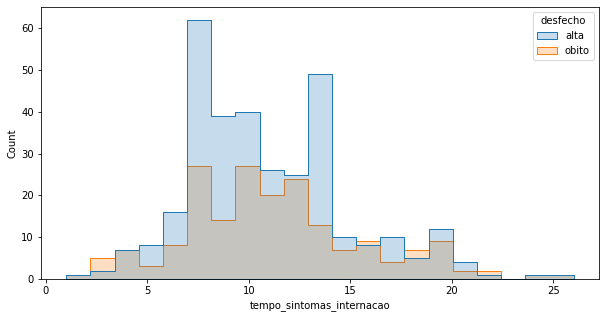

In [27]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data.dropna(subset=["tempo_sintomas_internacao"]), x = "tempo_sintomas_internacao", element="step", hue="desfecho")

Observa-se que a maior concentração dos dados se encontra entre 7 e 12 dias. Nesse intervalo as altas superam os óbitos. As maiores frequências de alta ocorrem em 7 e 14 dias. É raro casos de internação após os sintomas com 1 e 25 dias.

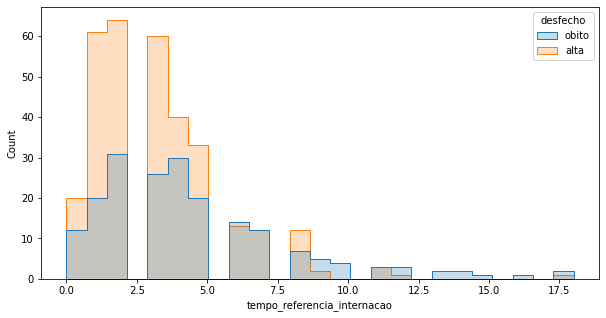

In [23]:
plt.figure(figsize = (10, 5))
chart = sns.histplot(data=data.dropna(subset=["tempo_referencia_internacao"]), x = "tempo_referencia_internacao", element="step", hue="desfecho")

Observa-se que a maior concentração dos dados se encontra entre 0 e 5 dias. Nesse intervalo as altas superam os óbitos. As maiores frequências de alta e óbito ocorrem neste intervalo. Após a entrada dos pacientes os casos de internação começa a diminuir após o quinto dia.

<AxesSubplot:xlabel='tempo_internacao', ylabel='Count'>

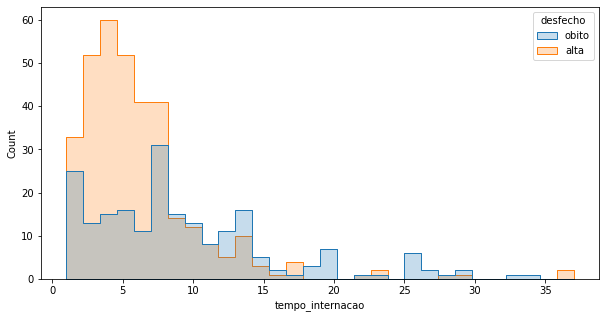

In [22]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data.dropna(subset=["tempo_internacao"]), x = "tempo_internacao", element="step", hue="desfecho")

Observa-se que a maior concentração dos dados se encontra entre 0 e 7 dias. Nesse intervalo as altas superam os óbitos. As maiores frequências de alta e óbito ocorrem neste intervalo. Os casos internação começam a diminuir após o sétimo dia. É notável uma inverção entre óbitos e alta após esse período.

<AxesSubplot:xlabel='tempo_vmi_total', ylabel='Count'>

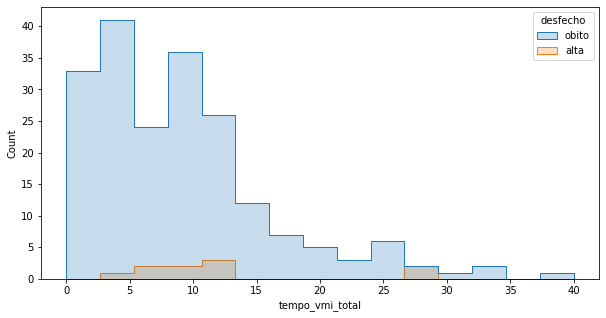

In [22]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data.dropna(subset=["tempo_vmi_total"]), x = "tempo_vmi_total", element="step", hue="desfecho")

Observa-se que a maior concentração dos dados se encontra entre 0 e 13 dias. Nesse intervalo os óbitos superam as altas. As maiores frequências de óbito ocorrem neste intervalo. Os casos de vmi começam a diminuir após o décimo terceiro dia. É notório a grande maioria de óbitos em relação aos casos de alta. Observa-se um caso discrepante de óbito com 40 dias de VMI.

<AxesSubplot:xlabel='tempo_uti_total', ylabel='Count'>

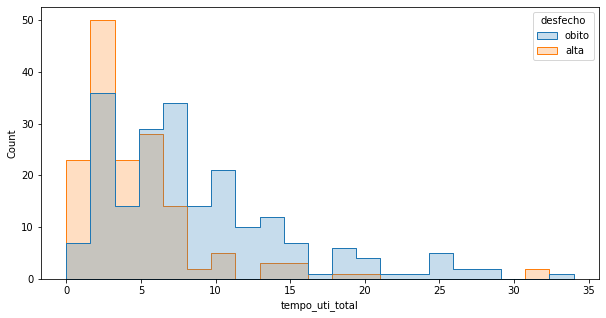

In [26]:
plt.figure(figsize = (10, 5))
sns.histplot(data=data.dropna(subset=["tempo_uti_total"]), x = "tempo_uti_total", element="step", hue="desfecho")

Observa-se que a maior concentração dos dados se encontra entre 0 e 13 dias. No começo deste intervalo (0 e 4 dias) as altas superam os óbitos. Após 4 dias os óbitos superam as altas. As maiores frequências de óbito e alta ocorrem neste intervalo. Os casos de uti começam a diminuir após o décimo terceiro dia. Observam-se dois cuiosos casos de alta nos dias 31 e 32.

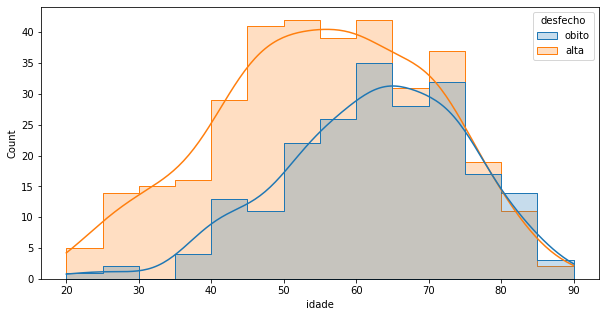

In [28]:
plt.figure(figsize = (10, 5))
chart = sns.histplot(data=data, x = "idade", hue="desfecho", element="step", kde=True )

Observa-se que a distribuição dos casos de óbito é deslocada para a direita em relação a distribuiçào dos casos de alta, ou seja, a população idosa é mais sucetível a casos de óbito. Os casos de alta são sempre superiores aos casos de óbito, salvo após 80 anos onde se observa uma inversão.

A seguir foram selecionadas no dataset as variáveis correspondentes a caracteristicas socioeconomicas dos pacientes. Utilizou-se um gráfico de barras para perceber a proporção entre as variáveis e assim a relevância das mesmas em relação aos casos de óbito e alta.

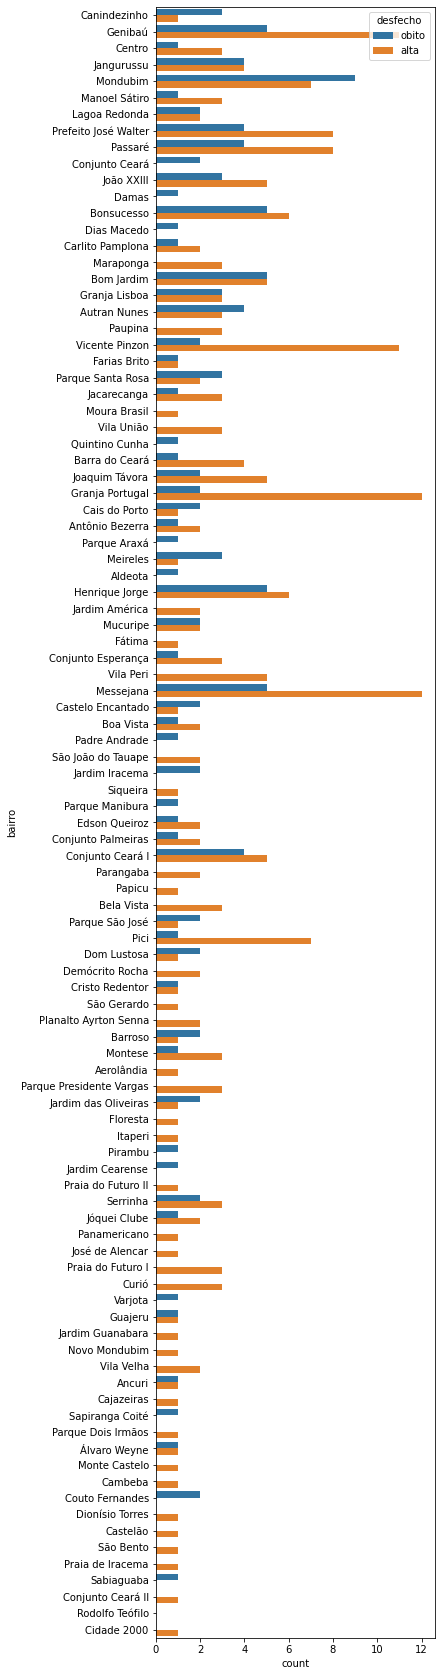

In [58]:
plt.figure(figsize = (5,30))
chart= sns.countplot(data=data, y = "bairro", hue="desfecho")
plt.show()

O gráfico a cima apresenta a quantidade dos casos de óbito e alta em relação aos bairros. O bairo Mondubim é o que apresenta mais óbitos. Os bairros que apresentam mais altas são Vicente Pizon, Granja Portugal, Messejana e Genibaú.

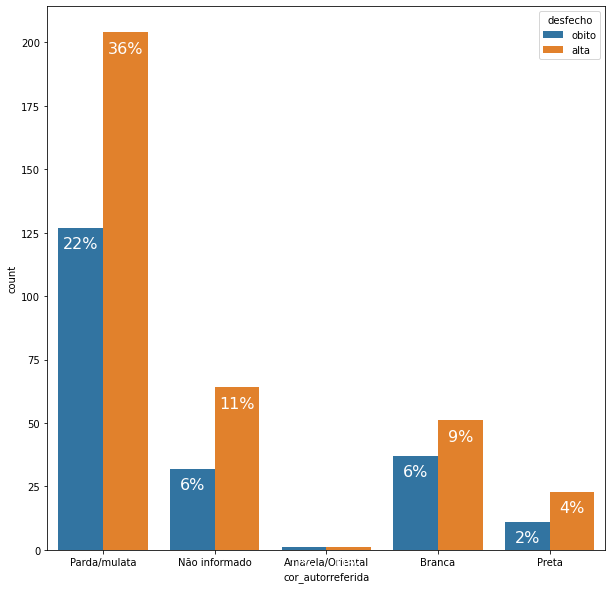

In [33]:
plt.figure(figsize = (10, 10))
chart= sns.countplot(data=data, x = "cor_autorreferida", hue="desfecho")
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
total= len(data.dropna(subset=["cor_autorreferida"]))
for p in chart.patches:
    chart.annotate(f'\n{int(round(p.get_height()/total,2)*100)}%', (p.get_x()+0.2, p.get_height()+3.5), ha='center', va='top', color='White', size=16)

plt.show()

Os pardos apresentam a maioria dos casos de óbito e alta. Os pretos apresentam os menores casos. Os casos de alta superam o de óbito.

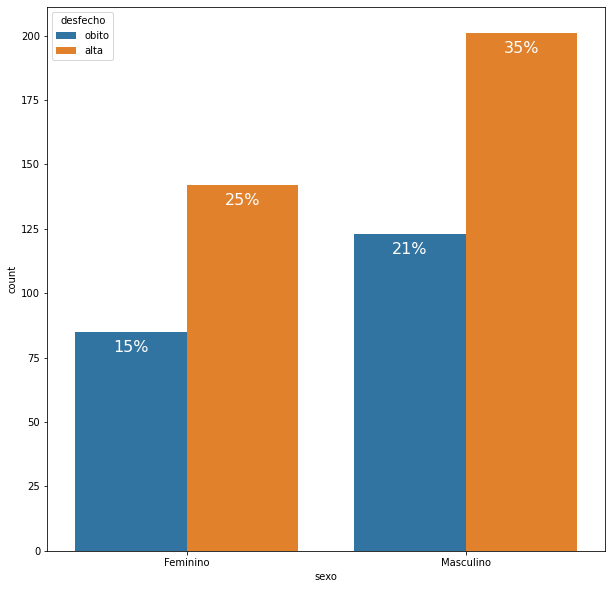

In [30]:
plt.figure(figsize = (10, 10))
chart= sns.countplot(data=data, x = "sexo", hue="desfecho")
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
total= len(data.dropna(subset=["sexo"]))
for p in chart.patches:
    chart.annotate(f'\n{int(round(p.get_height()/total,2)*100)}%', (p.get_x()+0.2, p.get_height()+3.5), ha='center', va='top', color='white', size=16)

plt.show()

Os homens apresentam mais casos que as mulheres. Os casos de alta superam os de óbito.

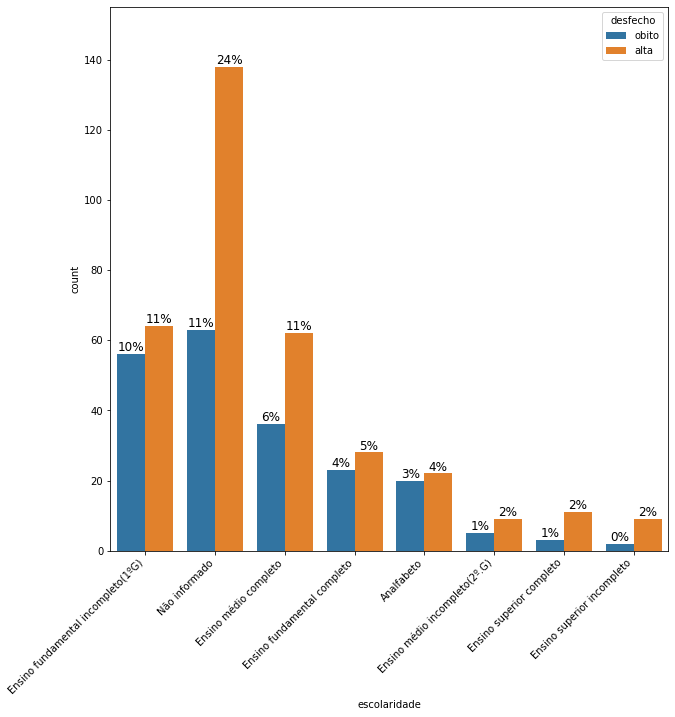

In [59]:
plt.figure(figsize = (10, 10))
chart= sns.countplot(data=data, x = "escolaridade", hue="desfecho")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_ylim(0,155)
total= len(data.dropna(subset=["escolaridade"]))
for p in chart.patches:
    chart.annotate(f'\n{int(round(p.get_height()/total,2)*100)}%', (p.get_x()+0.2, p.get_height()+8), ha='center', va='top', color='black', size=12)

plt.show()

O ensino fundamental incompleto apresenta praticamente a mesma proporção de óbito e alta. Os casos de alta superam o óbito. O ensino superior apresenta menos casos de covid do que o ensino fundamental incompleto.

A seguir foram selecionadas no dataset as variáveis correspondentes a casos de óbito em situações de UTI, VMI e em menos de 24 horas. Utilizou-se um gráfico de barras para perceber a proporção entre as variáveis e assim a relevância das mesmas em relação aos casos de óbito e alta.

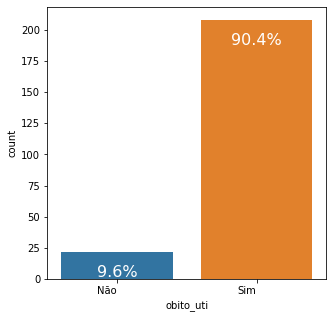

In [63]:
plt.figure(figsize = (5, 5))
chart= sns.countplot(data=data.dropna(subset=["obito_uti"]), x = "obito_uti")
chart.set_xticklabels(["Não", "Sim"], rotation=0, horizontalalignment='right')
total = len(data.dropna(subset=["obito_uti"]))
for p in chart.patches:
    chart.annotate(f'\n{round(p.get_height()/total,3)*100}%', (p.get_x()+0.4, p.get_height()+3.5), ha='center', va='top', color='white', size=16)
plt.show()

Observa-se 90% dos casos de obito em UTI. No entanto essa variável contém mais de 50% de entradas nulas.

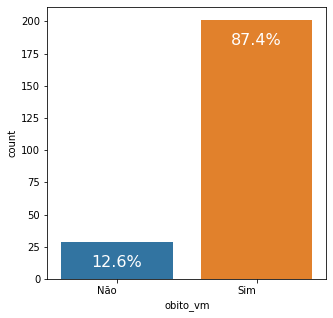

In [64]:
plt.figure(figsize = (5, 5))
chart= sns.countplot(data=data.dropna(subset=["obito_vm"]), x = "obito_vm")
chart.set_xticklabels(["Não", "Sim"], rotation=0, horizontalalignment='right')

total= len(data.dropna(subset=["obito_vm"]))
for p in chart.patches:
    chart.annotate(f'\n{round(p.get_height()/total,3)*100}%', (p.get_x()+0.4, p.get_height()+3.5), ha='center', va='top', color='white', size=16)

plt.show()

Observa-se aproximadamente 90% dos casos de obito com VM. No entanto essa variável contém mais de 50% de entradas nulas.

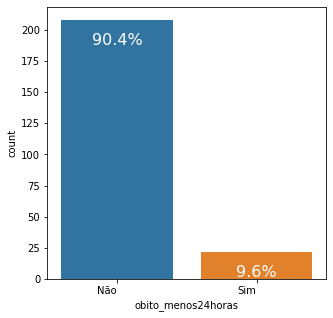

In [65]:
plt.figure(figsize = (5, 5))
chart= sns.countplot(data=data.dropna(subset=["obito_menos24horas"]), x = "obito_menos24horas")
chart.set_xticklabels(["Não", "Sim"], rotation=0, horizontalalignment='right')

total= len(data.dropna(subset=["obito_menos24horas"]))
for p in chart.patches:
    chart.annotate(f'\n{round(p.get_height()/total,3)*100}%', (p.get_x()+0.4, p.get_height()+3.5), ha='center', va='top', color='white', size=16)


plt.show()

Observa-se 90% dos casos de alta em menos de 24 horas. No entanto essa variável contém mais de 50% de entradas nulas.

A seguir utilizou-se um gráfico de Pareto no intuito de destacar a relevancia das variáveis em relação aos casos de óbito e alta.

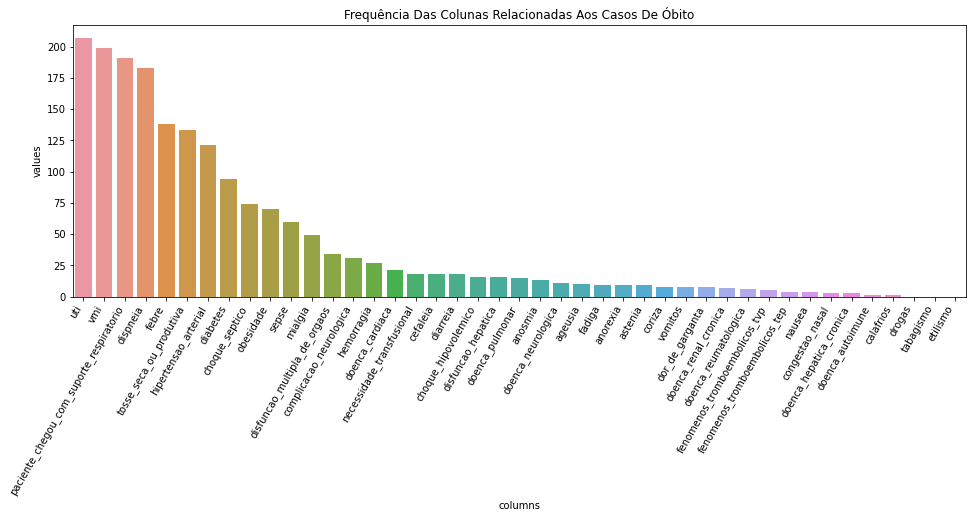

In [39]:
columns = []
values = []
data_obt = data.loc[data['desfecho'] == "obito"]
for i in data_obt.columns[1:44]:
    try:
        values.append(data_obt[i].value_counts()[True])
        columns.append(i)
    except:
        values.append(0)
        columns.append(i)
df = pd.DataFrame(list(zip(columns, values)),
               columns =['columns', 'values'])
df.sort_values(by='values',ascending=False, inplace=True)
plt.figure(figsize = (16,5))
chart = sns.barplot(data=df, x="columns", y="values")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
chart.set_title("Frequência das colunas relacionadas aos casos de óbito".title())
plt.show()

Os primeiros casos são mais frequentes em casos de óbito. Observa-se que após a variável hipertensão_arterial há uma queda na frequência. As variáveis UTI e VMI estão fortemente correlacionadas com casos de óbitos, assim como demonstrou a matriz de correlação.

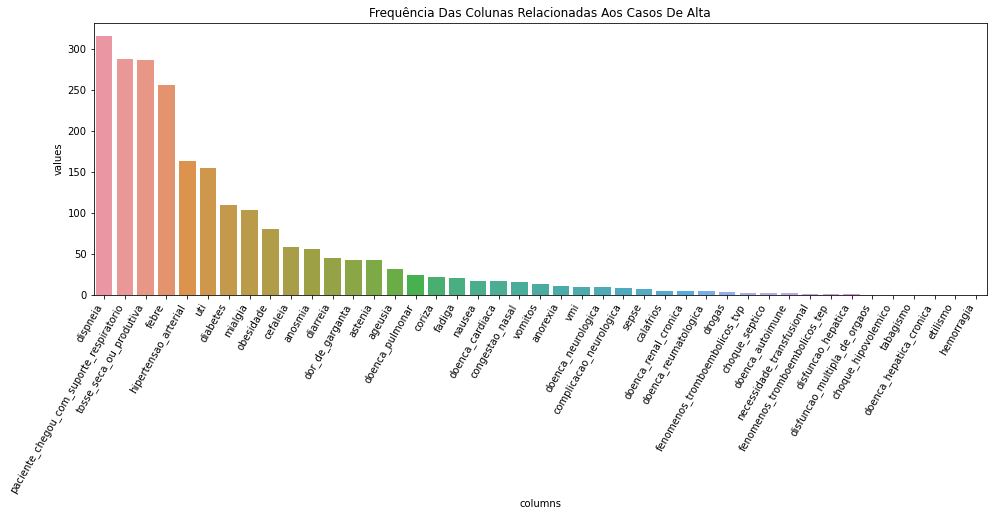

In [38]:
columns = []
values = []
data_alt = data.loc[data['desfecho'] == "alta"]
for i in data_alt.columns[1:44]:
    try:
        values.append(data_alt[i].value_counts()[True])
        columns.append(i)
    except:
        values.append(0)
        columns.append(i)
df = pd.DataFrame(list(zip(columns, values)),
               columns =['columns', 'values'])
df.sort_values(by='values',ascending=False, inplace=True)
plt.figure(figsize = (16,5))
chart = sns.barplot(data=df, x="columns", y="values")
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
chart.set_title("Frequência das colunas relacionadas aos casos de alta".title())
plt.show()

Os primeiros casos são mais frequentes em casos de altas. Observa-se que após a variável febre há uma queda na frequência. As variáveis UTI e VMI são menos frequentes em casos de alta.

# 3. Análise Preditiva e Prescritiva dos Dados

Esta etapa consiste na análise preditiva e prescritiva dos dados a partir da aplicação de modelos preditivos que estão em destaque atualmente no campo da ciência de dados: Regressão Logística, Random Forest e Rede Neural. O objetivo dessa etapa é treinar, avaliar e comparar um conjunto de modelos preditivos. Em seguida é realizada uma análise relativa à relevância das variáveis em relação ao desempenho dos modelos. 

Para as funções de split foi utilizado o random_state=42 para que os resultados reproduzidos posteriormente em outros sistemas.

#### Nesse split dos dados foram selecionadas as variáveis das colunas 1 a 43 correspondente aos sintômas, Histórico pessoal, Comorbidades, Complicações dentre algumas outras, como UTI, VMI e Idade.

In [159]:
colunas = data.columns[1:44]
colunas.append(data.columns[55:56])
data_tratado = data.dropna(subset=["desfecho"])
X_train, X_test, y_train, y_test = train_test_split(data_tratado.drop(columns=data.columns.difference(colunas)), data_tratado["desfecho"], test_size=0.33, random_state=42)

###### Criação e avaliação dos modelos preditivos:

In [45]:
logReg = LogisticRegression()
RandForClass = RandomForestClassifier()
NeuClass = MLPClassifier()

In [46]:
logReg.fit(X_train, y_train)
RandForClass.fit(X_train, y_train)
NeuClass.fit(X_train, y_train)

C:\Users\hehehe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [162]:
predLog = logReg.predict(X_test)
predRand = RandForClass.predict(X_test)
predNeu = NeuClass.predict(X_test)

##### Logistic Regression

In [163]:
confusion_matrix(y_test, predLog)

array([[105,   2],
       [  3,  73]], dtype=int64)

In [164]:
print(classification_report(y_test, predLog))

              precision    recall  f1-score   support

        alta       0.97      0.98      0.98       107
       obito       0.97      0.96      0.97        76

    accuracy                           0.97       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183



##### Random Forest

In [165]:
confusion_matrix(y_test, predRand)

array([[105,   2],
       [  5,  71]], dtype=int64)

In [166]:
print(classification_report(y_test, predRand))

              precision    recall  f1-score   support

        alta       0.95      0.98      0.97       107
       obito       0.97      0.93      0.95        76

    accuracy                           0.96       183
   macro avg       0.96      0.96      0.96       183
weighted avg       0.96      0.96      0.96       183



##### Rede Neural

In [167]:
confusion_matrix(y_test, predNeu)

array([[105,   2],
       [  6,  70]], dtype=int64)

In [168]:
print(classification_report(y_test, predNeu))

              precision    recall  f1-score   support

        alta       0.95      0.98      0.96       107
       obito       0.97      0.92      0.95        76

    accuracy                           0.96       183
   macro avg       0.96      0.95      0.95       183
weighted avg       0.96      0.96      0.96       183



Os três modelos treinados apresentaram bons e similares resultados o que provavelmente indica que são adequandos à natureza do dataset. No entanto, nos treinamento seguintes, decidiu-se reduzir o espaço de variáveis utilizadas para compreender a relevância do conjunto de variáveis em relação ao desempenho da classificação.

#### Nesse split dos dados foram selecionadas as variáveis das colunas 1 a 17 correspondente aos sintômas.

In [109]:
colunas = data.columns[1:18]
data_tratado = data.dropna(subset=["desfecho"])
X_train, X_test, y_train, y_test = train_test_split(data_tratado.drop(columns=data.columns.difference(colunas)), data_tratado["desfecho"], test_size=0.33, random_state=42)

###### Criação e avaliação dos modelos preditivos:

In [47]:
logReg.fit(X_train, y_train)
RandForClass.fit(X_train, y_train)
NeuClass.fit(X_train, y_train)

C:\Users\hehehe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [111]:
predLog = logReg.predict(X_test)
predRand = RandForClass.predict(X_test)
predNeu = NeuClass.predict(X_test)

##### Logistic Regression

In [112]:
print(confusion_matrix(y_test, predLog))

[[92 15]
 [51 25]]


In [113]:
print(classification_report(y_test, predLog))

              precision    recall  f1-score   support

        alta       0.64      0.86      0.74       107
       obito       0.62      0.33      0.43        76

    accuracy                           0.64       183
   macro avg       0.63      0.59      0.58       183
weighted avg       0.64      0.64      0.61       183



##### Random Forest

In [114]:
print(confusion_matrix(y_test, predRand))

[[86 21]
 [54 22]]


In [115]:
print(classification_report(y_test, predRand))

              precision    recall  f1-score   support

        alta       0.61      0.80      0.70       107
       obito       0.51      0.29      0.37        76

    accuracy                           0.59       183
   macro avg       0.56      0.55      0.53       183
weighted avg       0.57      0.59      0.56       183



##### Rede Neural

In [116]:
print(confusion_matrix(y_test, predNeu))

[[93 14]
 [54 22]]


In [117]:
print(classification_report(y_test, predNeu))

              precision    recall  f1-score   support

        alta       0.63      0.87      0.73       107
       obito       0.61      0.29      0.39        76

    accuracy                           0.63       183
   macro avg       0.62      0.58      0.56       183
weighted avg       0.62      0.63      0.59       183



Os três modelos treinados apresentaram novamente resultados similares, porém desta vez seu desempenho foi pior, o que pode indicar overfitting dos modelos quando utilizadas as colunas da 1 a 43. Desta forma decidiu-se adicionar progressivamente novos conjuntos de variáveis no treinamento do algoritmo de melhor desempenho, que foi a Regrssão Logistica.

Assim como é mostrado na célula abaixo selecionamos dessa vez apenas variáveis relacionadas comorbidades para serem utilizadas no treino.

In [40]:
colunas = data.columns[21:31]

In [41]:
data_tratado = data.dropna(subset=["desfecho"])
X_train, X_test, y_train, y_test = train_test_split(data_tratado.drop(columns=data.columns.difference(colunas)), data_tratado["desfecho"], test_size=0.33, random_state=42)

In [48]:
logReg.fit(X_train, y_train)
predLog = logReg.predict(X_test)

In [49]:
print(confusion_matrix(y_test, predLog))
print(classification_report(y_test, predLog))

[[98  5]
 [76  4]]
              precision    recall  f1-score   support

        alta       0.56      0.95      0.71       103
       obito       0.44      0.05      0.09        80

    accuracy                           0.56       183
   macro avg       0.50      0.50      0.40       183
weighted avg       0.51      0.56      0.44       183



Novamente pudemos notar que o modelo não desempenha tão bem quando o primeiro.

Tentamos então fazer a união entre os dois conjuntos de variáveis testados anteriormente (Sintômas e Comorbidades)

In [108]:
data.columns[1:18]

Index(['coriza', 'tosse_seca_ou_produtiva', 'calafrios', 'febre', 'dispneia',
       'fadiga', 'anorexia', 'mialgia', 'astenia', 'dor_de_garganta',
       'congestao_nasal', 'cefaleia', 'diarreia', 'nausea', 'vomitos',
       'anosmia', 'ageusia'],
      dtype='object')

In [105]:
data.columns[21:31]

Index(['diabetes', 'obesidade', 'hipertensao_arterial', 'doenca_cardiaca',
       'doenca_pulmonar', 'doenca_reumatologica', 'doenca_autoimune',
       'doenca_renal_cronica', 'doenca_hepatica_cronica',
       'doenca_neurologica'],
      dtype='object')

In [126]:
colunas = data.columns[1:18]
colunas.append(data.columns[21:31])

Index(['coriza', 'tosse_seca_ou_produtiva', 'calafrios', 'febre', 'dispneia',
       'fadiga', 'anorexia', 'mialgia', 'astenia', 'dor_de_garganta',
       'congestao_nasal', 'cefaleia', 'diarreia', 'nausea', 'vomitos',
       'anosmia', 'ageusia', 'diabetes', 'obesidade', 'hipertensao_arterial',
       'doenca_cardiaca', 'doenca_pulmonar', 'doenca_reumatologica',
       'doenca_autoimune', 'doenca_renal_cronica', 'doenca_hepatica_cronica',
       'doenca_neurologica'],
      dtype='object')

In [127]:
data_tratado = data.dropna(subset=["desfecho"])
X_train, X_test, y_train, y_test = train_test_split(data_tratado.drop(columns=data.columns.difference(colunas)), data_tratado["desfecho"], test_size=0.33, random_state=42)

In [128]:
logReg.fit(X_train, y_train)
predLog = logReg.predict(X_test)

In [129]:
print(confusion_matrix(y_test, predLog))
print(classification_report(y_test, predLog))

[[92 15]
 [51 25]]
              precision    recall  f1-score   support

        alta       0.64      0.86      0.74       107
       obito       0.62      0.33      0.43        76

    accuracy                           0.64       183
   macro avg       0.63      0.59      0.58       183
weighted avg       0.64      0.64      0.61       183



O modelo novamente não desempenhou como o primeiro modelo, o leva a crer  que a(s) variável(eis) responsável(eis) pela alta acurácia do primeiro modelo se encontra entre as colunas 31 e 43, o que testamos a seguir.

In [144]:
colunas = data.columns[31:44]
data_tratado = data.dropna(subset=["desfecho"])
X_train, X_test, y_train, y_test = train_test_split(data_tratado.drop(columns=data.columns.difference(colunas)), data_tratado["desfecho"], test_size=0.33, random_state=42)

In [145]:
logReg.fit(X_train, y_train)
predLog = logReg.predict(X_test)

In [146]:
print(confusion_matrix(y_test, predLog))
print(classification_report(y_test, predLog))

[[105   2]
 [  3  73]]
              precision    recall  f1-score   support

        alta       0.97      0.98      0.98       107
       obito       0.97      0.96      0.97        76

    accuracy                           0.97       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183



Novamente obtivemos um resultado tão bom quanto o do primeiro modelo, entretanto utilizamos apenas um terço das variáveis.

Por fim, ao reanalizar o gráfico de pareto relacionado aos óbitos e à matriz de correlação foi possível notar que talvez as colunas responsáveis fossem vmi e uti, o que foi testado e comprovado a seguir.

In [151]:
data.columns[32:34]

Index(['vmi', 'uti'], dtype='object')

In [148]:
colunas = data.columns[32:34]
data_tratado = data.dropna(subset=["desfecho"])
X_train, X_test, y_train, y_test = train_test_split(data_tratado.drop(columns=data.columns.difference(colunas)), data_tratado["desfecho"], test_size=0.33, random_state=42)

In [149]:
logReg.fit(X_train, y_train)
predLog = logReg.predict(X_test)

In [150]:
print(confusion_matrix(y_test, predLog))
print(classification_report(y_test, predLog))

[[105   2]
 [  3  73]]
              precision    recall  f1-score   support

        alta       0.97      0.98      0.98       107
       obito       0.97      0.96      0.97        76

    accuracy                           0.97       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183



Percebeu-se que as variáveis vmi e uti são relevantes na determinação de casos de óbito. Além disso, a utilização de outras variáveis (sintomas, comorbidades, etc.)  também podem trazer indícios de casos de óbito, no entanto estão menos correlacionadas, o que torna o modelo preditivo menos acurado.
<br>
Como perspectivas é desejável um estudo mais aprofundado sobre as variáveis que influenciam em casos de óbito da covid-19. Além disso, a busca por outros datasets se mostra promissor para a análise de dados no domínio da pandemia da covid-19